In [1]:
#Importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
import plotly.express as px
import seaborn as sns
import warnings
from plotnine import *
from plotnine.data import *
import scipy as sp
from scipy.interpolate import interp1d
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: Fut

In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

## Read the Avocado Data

In [2]:
raw_data = pd.read_csv('E:/Springboard/Students/Erika Sam/Capstone Project 1/avocado-prices/avocado.csv')

In [3]:
raw_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
raw_data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
raw_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
raw_data['Date']=pd.to_datetime(raw_data['Date'])

In [5]:
raw_data = raw_data.sort_values('Date')

In [6]:
raw_data['Year']         = pd.DatetimeIndex(raw_data['Date']).year
raw_data['Month']        = pd.DatetimeIndex(raw_data['Date']).month
raw_data['Month_Name']   = raw_data['Month'].apply(lambda x: calendar.month_abbr[x])
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

## Histograms for Average Price

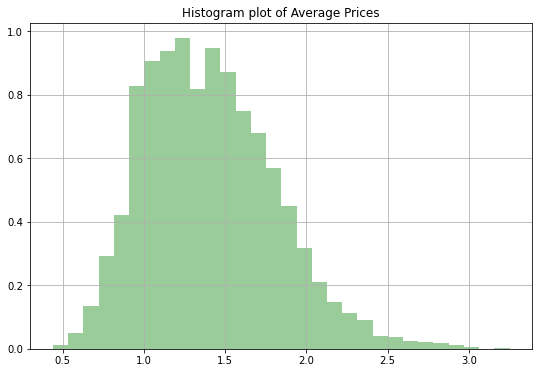

In [10]:
fig = plt.figure(figsize = (9,6))
plt.hist(raw_data['AveragePrice'], bins = 30, alpha = 0.4, color='green', density=True)
plt.title('Histogram plot of Average Prices')
plt.grid(b=None)

Text(0, 0.5, 'Average Price')

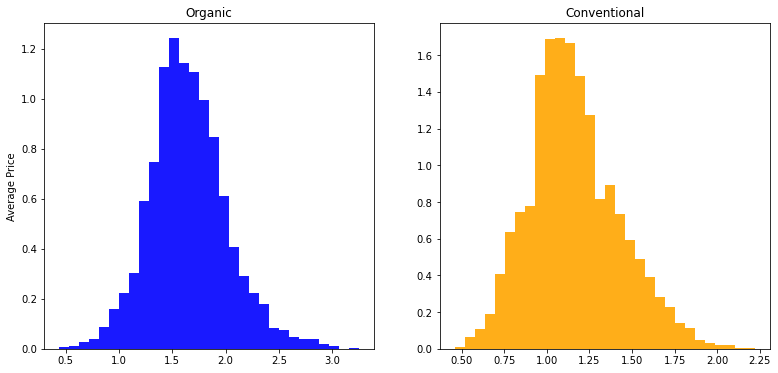

In [21]:
fig, ax =plt.subplots(1,2,figsize=(13,6))
ax0, ax1 = ax.flatten()
x = raw_data[raw_data['type'] =='organic']
y = raw_data[raw_data['type'] !='organic'] 

ax0.hist(x['AveragePrice'], bins = 30, alpha = 0.9, color='blue', density=True)
ax1.hist(y['AveragePrice'], bins = 30, alpha = 0.9, color='orange', density=True)

ax0.set_title("Organic")
ax1.set_title("Conventional")

ax0.set_ylabel('Average Price')

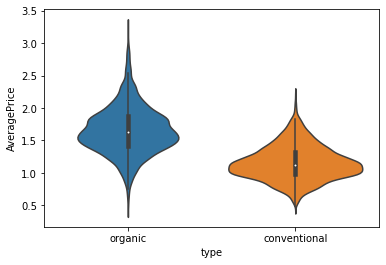

In [15]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y='AveragePrice',x='type',data=raw_data)

## Average Prices across year

Text(0.5, 0, 'Date')

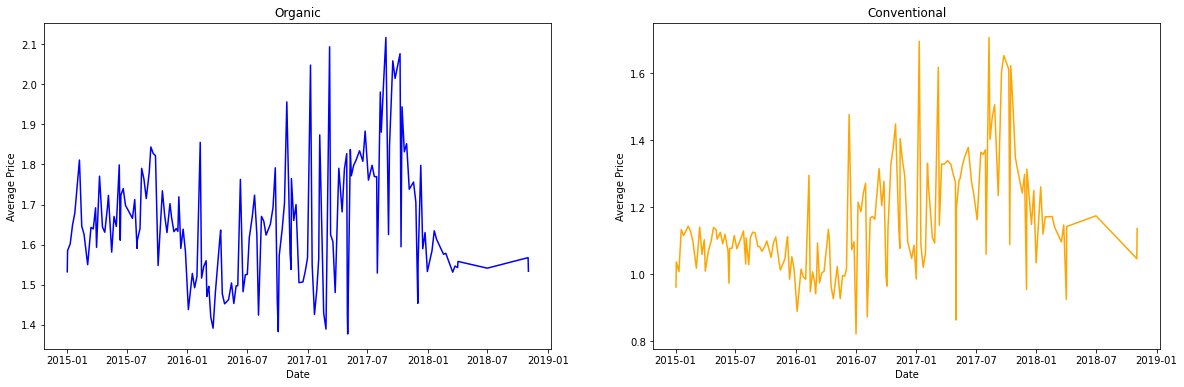

In [42]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
ax0, ax1 = ax.flatten()
## Organic
X = raw_data[raw_data['type'] =='organic']
groupBy1_price = X.groupby('Date',as_index=False).mean()
XX = groupBy1_price['Date']
YY = groupBy1_price['AveragePrice']

ax0.plot(XX,YY, color = "blue")
ax0.set_title('Organic')
ax0.set_ylabel('Average Price')
ax0.set_xlabel('Date')

## Conventional
Y = raw_data[raw_data['type'] !='organic'] 
groupBy2_price = Y.groupby('Date',as_index=False).mean()
XX = groupBy2_price['Date']
YY = groupBy2_price['AveragePrice']

ax1.plot(XX,YY, color = 'orange')
ax1.set_title('Conventional')
ax1.set_ylabel('Average Price')
ax1.set_xlabel('Date')

## Plot by Volume for both type of Avocados

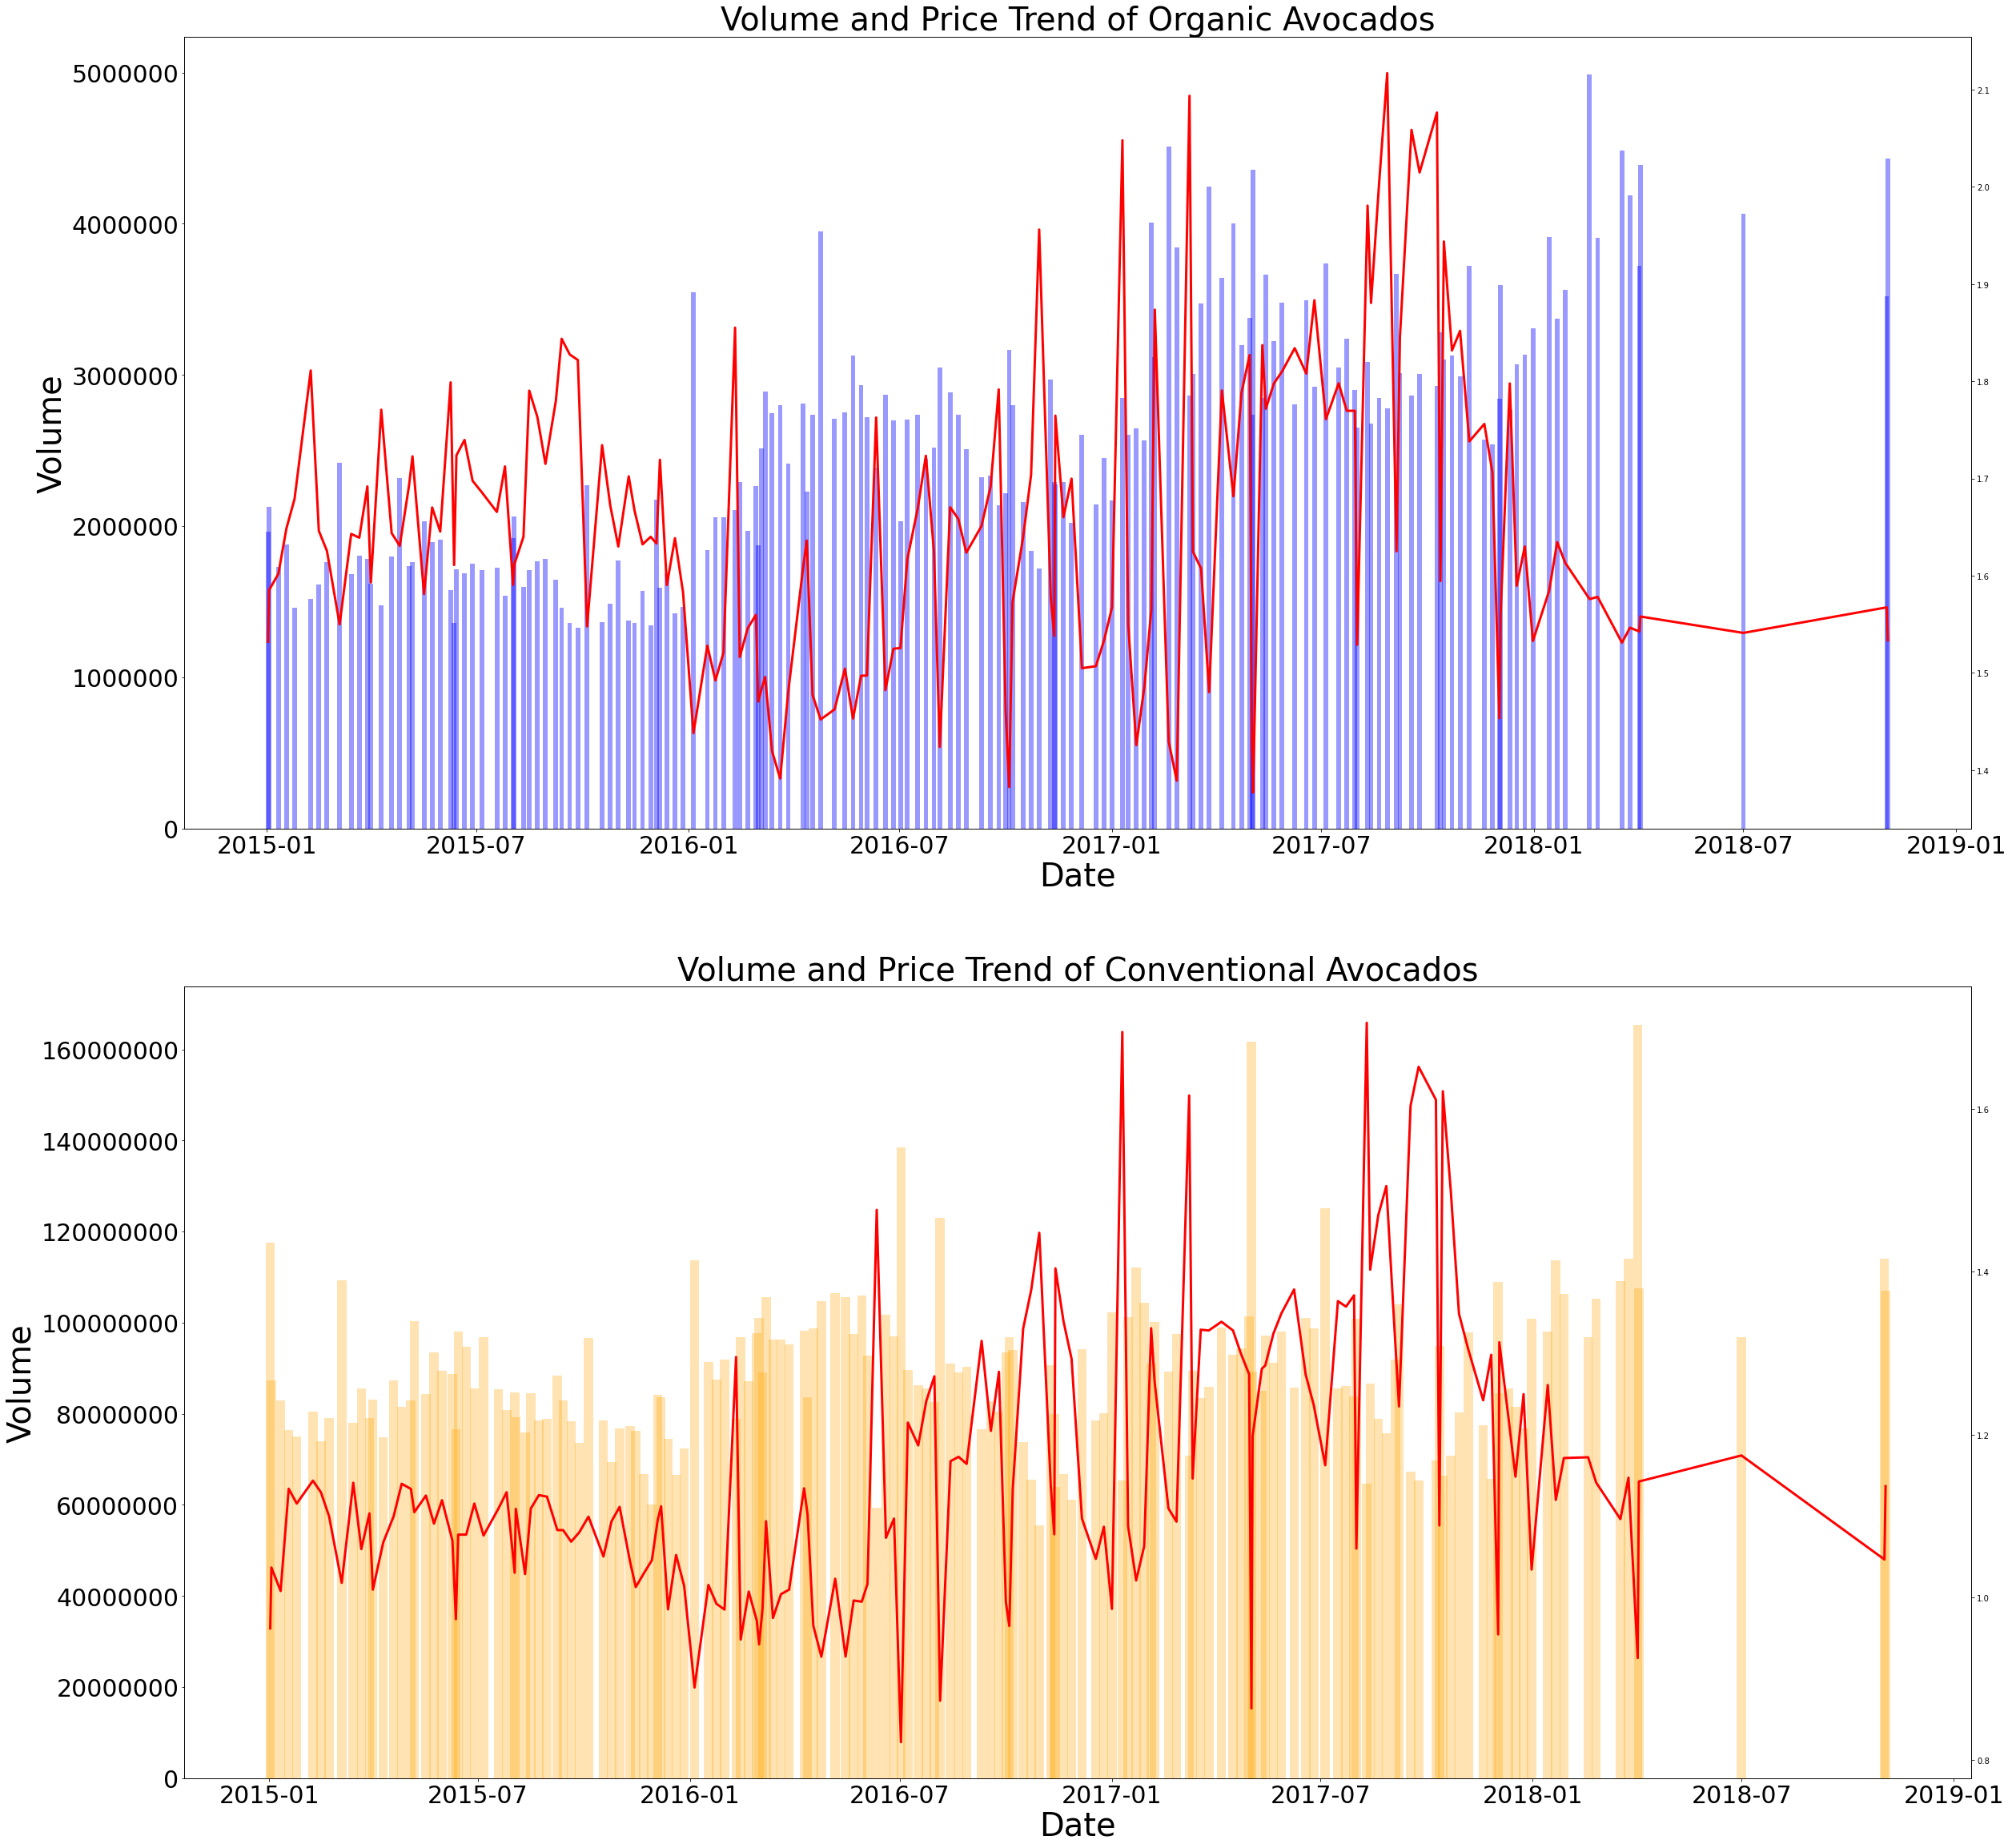

In [90]:
fig, ax =plt.subplots(2,1,figsize=(40,40))
ax0, ax1 = ax.flatten()

ax2 = ax0.twinx()  # set up the 2nd axis
ax3 = ax1.twinx()



groupBy1_Vol = X.groupby('Date',as_index=False).sum()
XX = groupBy1_Vol['Date']
YY = groupBy1_Vol['Total Volume']
YYY = groupBy1_price['AveragePrice']


ax0.bar(XX, YY,width=4, color='blue', alpha =0.4)
ax0.ticklabel_format(style='plain',axis='y')
ax0.set_title('Volume and Price Trend of Organic Avocados', fontsize = 40)
ax0.set_xlabel('Date',fontsize = 40)
ax0.set_ylabel('Volume',fontsize = 40)
ax0.tick_params(axis='both', which='major', labelsize=30)
ax2.plot(XX,YYY, color = 'red', linewidth=3)

groupBy2_Vol = Y.groupby('Date',as_index=False).sum()
XX = groupBy2_Vol['Date']
YY = groupBy2_Vol['Total Volume']
YYY = groupBy2_price['AveragePrice']

ax1.bar(XX, YY,width=8, color='orange', alpha = 0.3)
ax1.ticklabel_format(style='plain',axis='y')
ax1.set_title('Volume and Price Trend of Conventional Avocados', fontsize=40)
ax1.set_xlabel('Date',fontsize = 40)
ax1.set_ylabel('Volume',fontsize = 40)
ax1.tick_params(axis='both', which='major', labelsize=30)
ax3.plot(XX,YYY, color = 'red', linewidth=3)

## Analyzing Prices by Year and Months

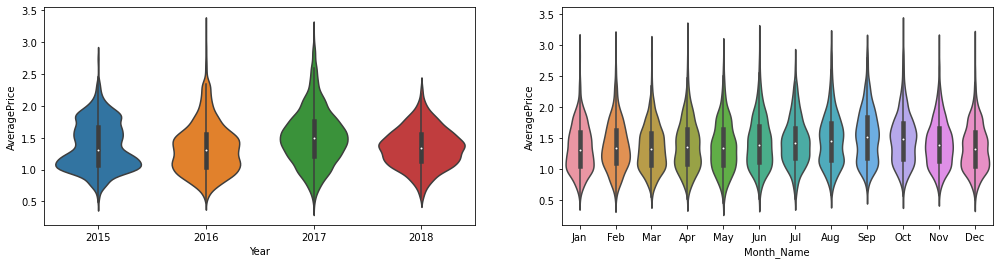

In [9]:
# Plot a violin plot of the average price vs. avocado type
fig, ax =plt.subplots(1,2,figsize=(17,4))
sns.violinplot(y='AveragePrice',x='Year',data=raw_data, ax=ax[0])
sns.violinplot(y='AveragePrice',x='Month_Name',data=raw_data, ax=ax[1])
fig.show()

Text(0, 0.5, 'Average Price')

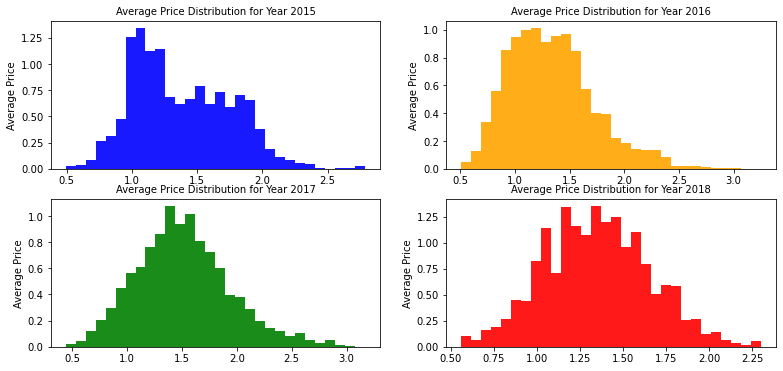

In [16]:
fig, ax =plt.subplots(2,2,figsize=(13,6))
ax0, ax1, ax2, ax3 = ax.flatten()

x1 = raw_data[raw_data['Year'] ==2015]
x2 = raw_data[raw_data['Year'] ==2016]
x3 = raw_data[raw_data['Year'] ==2017]
x4 = raw_data[raw_data['Year'] ==2018]

ax0.hist(x1['AveragePrice'], bins = 30, alpha = 0.9, color='blue', density=True)
ax1.hist(x2['AveragePrice'], bins = 30, alpha = 0.9, color='orange', density=True)
ax2.hist(x3['AveragePrice'], bins = 30, alpha = 0.9, color='Green', density=True)
ax3.hist(x4['AveragePrice'], bins = 30, alpha = 0.9, color='red', density=True)

ax0.set_title("Average Price Distribution for Year 2015", fontsize=10)
ax1.set_title("Average Price Distribution for Year 2016", fontsize=10)
ax2.set_title("Average Price Distribution for Year 2017", fontsize=10)
ax3.set_title("Average Price Distribution for Year 2018", fontsize=10)

ax0.set_ylabel("Average Price")
ax1.set_ylabel("Average Price")
ax2.set_ylabel("Average Price")
ax3.set_ylabel("Average Price")

## Analyzing by month

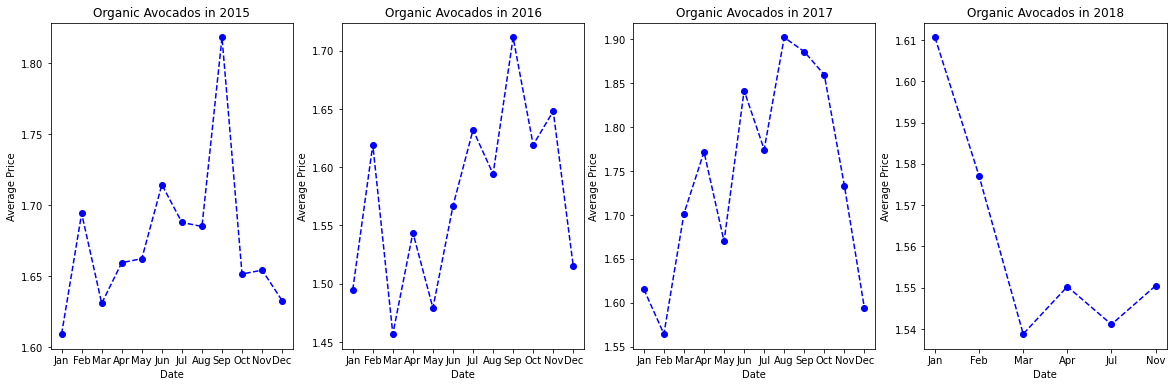

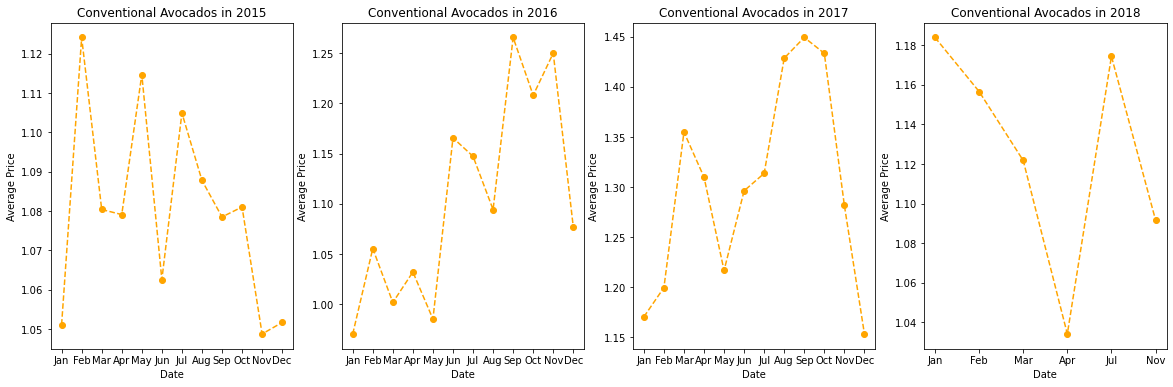

In [68]:
fig, ax =plt.subplots(1,4,figsize=(20,6))
ax0, ax1, ax2, ax3 = ax.flatten()
Year  = [2015,2016,2017,2018]

## Organic

for i in range(0,4):
    X = raw_data[(raw_data['type'] =='organic') & (raw_data['Year'] ==Year[i])]
    groupBy1_price = X.groupby('Month_Name',as_index=False).mean()
    groupBy1_price = groupBy1_price.sort_values(by=['Month'])
    XX = groupBy1_price['Month_Name']
    YY = groupBy1_price['AveragePrice']
    
    ax[i].plot(XX,YY, color = "blue", marker='o', linestyle='--')
    ax[i].set_title("Organic Avocados in {}".format(Year[i]))
    ax[i].set_ylabel('Average Price')
    ax[i].set_xlabel('Date')
    


fig, axx =plt.subplots(1,4,figsize=(20,6))
axxo, axx1, axx2, axx3 = axx.flatten()
Year  = [2015,2016,2017,2018]

## Conventional

for i in range(0,4):
    X = raw_data[(raw_data['type'] =='conventional') & (raw_data['Year'] ==Year[i])]
    groupBy1_price = X.groupby('Month_Name',as_index=False).mean()
    groupBy1_price = groupBy1_price.sort_values(by=['Month'])
    XX = groupBy1_price['Month_Name']
    YY = groupBy1_price['AveragePrice']
    
    axx[i].plot(XX,YY, color = "orange", marker='o', linestyle='--')
    axx[i].set_title("Conventional Avocados in {}".format(Year[i]))
    axx[i].set_ylabel('Average Price')
    axx[i].set_xlabel('Date')

## Analyzing the Price Volatility by Month & Year

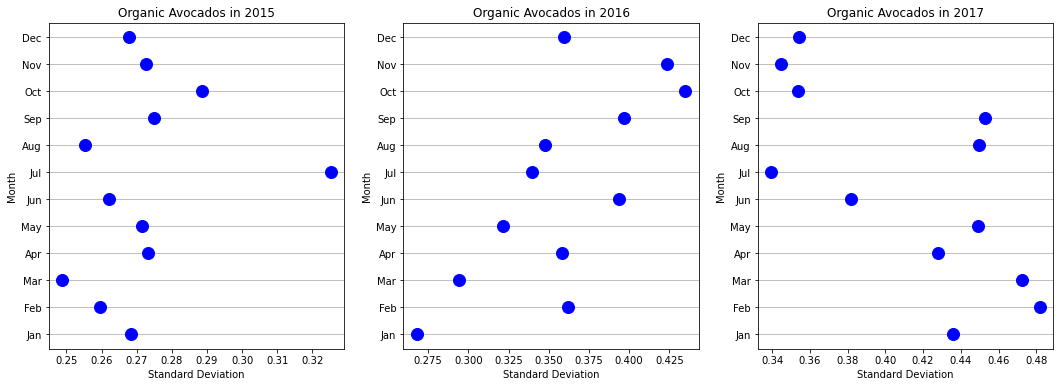

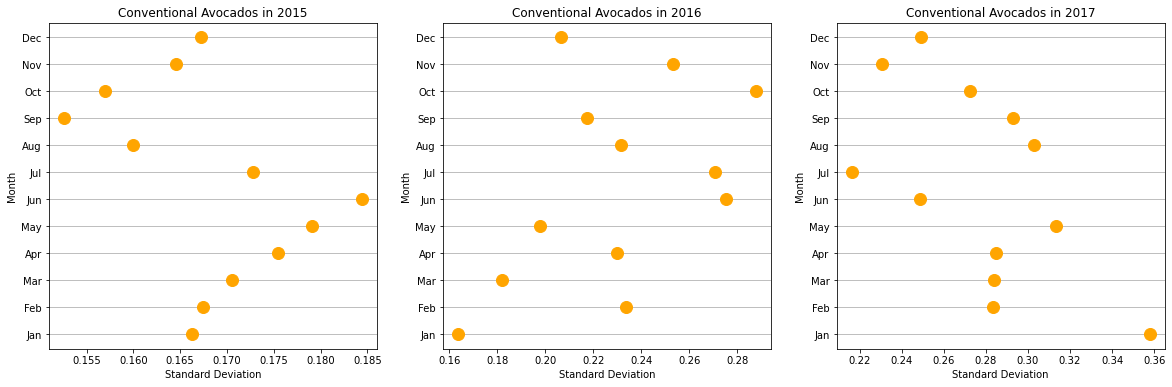

In [98]:
fig, ax =plt.subplots(1,3,figsize=(18,6))
ax0, ax1, ax2 = ax.flatten()
Year  = [2015,2016,2017]

## Organic

for i in range(0,3):
    X = raw_data[(raw_data['type'] =='organic') & (raw_data['Year'] ==Year[i])]
    X = X[['Month_Name', 'Month','AveragePrice']]
    groupBy1_price = X.groupby(['Month_Name', 'Month'],as_index=False)[['AveragePrice']].agg(np.std, ddof=0)
    groupBy1_price = groupBy1_price.sort_values(by=['Month'])
    XX = groupBy1_price['Month_Name']
    YY = groupBy1_price['AveragePrice']
    
    ax[i].plot(YY,XX, color = "blue", marker='o', linestyle = 'None', markersize=12)
    ax[i].set_title("Organic Avocados in {}".format(Year[i]))
    ax[i].set_ylabel('Month')
    ax[i].set_xlabel('Standard Deviation')
    ax[i].yaxis.grid()


fig, axx =plt.subplots(1,3,figsize=(20,6))
axxo, axx1, axx2 = axx.flatten()
Year  = [2015,2016,2017]

## Conventional

for i in range(0,3):
    X = raw_data[(raw_data['type'] =='conventional') & (raw_data['Year'] ==Year[i])]
    X = X[['Month_Name', 'Month','AveragePrice']]
    groupBy1_price = X.groupby(['Month_Name', 'Month'],as_index=False)[['AveragePrice']].agg(np.std, ddof=0)
    groupBy1_price = groupBy1_price.sort_values(by=['Month'])
    XX = groupBy1_price['Month_Name']
    YY = groupBy1_price['AveragePrice']
    
    axx[i].plot(YY, XX, color = "orange", marker='o', linestyle='None',markersize=12)
    axx[i].set_title("Conventional Avocados in {}".format(Year[i]))
    axx[i].set_ylabel('Month')
    axx[i].set_xlabel('Standard Deviation')
    axx[i].yaxis.grid()